<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">Employee attrition prediction</div>

![](https://www.aihr.com/wp-content/uploads/High-employee-turnover.jpg)

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Introduction</div>
            
**The Attrition Prediction model estimates the attrition risk for your employee populations in real-time, which is recalculated every time an employee submits feedback. The aggregated, segment-level view keeps the accuracy of your predictions high while protecting individual employee identity.**

# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Download Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv("sample_submission.csv")

# Data exploring

In [3]:
train

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


In [4]:
test

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,...,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,...,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,...,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,...,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,...,1,80,0,1,5,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2791,31,Travel_Rarely,755,Sales,1,1,Life Sciences,1,3,...,3,80,1,1,1,3,1,0,0,0
1115,2792,40,Travel_Rarely,654,Research & Development,26,5,Medical,1,3,...,4,80,1,20,4,3,20,10,1,8
1116,2793,42,Travel_Frequently,884,Research & Development,1,4,Medical,1,2,...,1,80,1,10,2,2,5,3,0,2
1117,2794,25,Travel_Frequently,1469,Sales,1,2,Technical Degree,1,3,...,4,80,1,5,2,3,4,2,1,3


# Data preprocessing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

<Axes: >

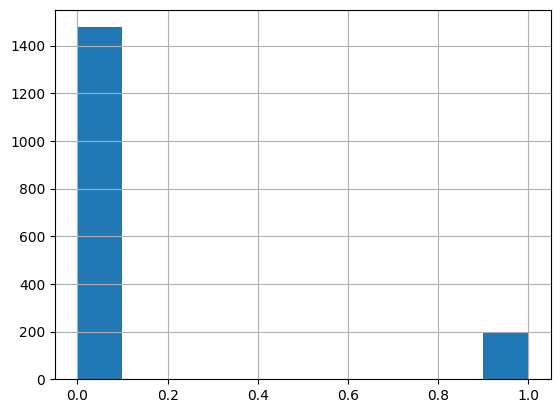

In [6]:
train.Attrition.hist()

In [7]:
class conf:
    index = 'id'
    target = 'Attrition'
    random = 2023
    
    load_original = True
np.random.seed(conf.random)

In [8]:
num_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
            "HourlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
            "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
            "YearsWithCurrManager"]
cat_cols = train.drop([conf.target], axis=1).columns.difference(num_cols)
cat_cols

Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'WorkLifeBalance', 'id'],
      dtype='object')

# EDA

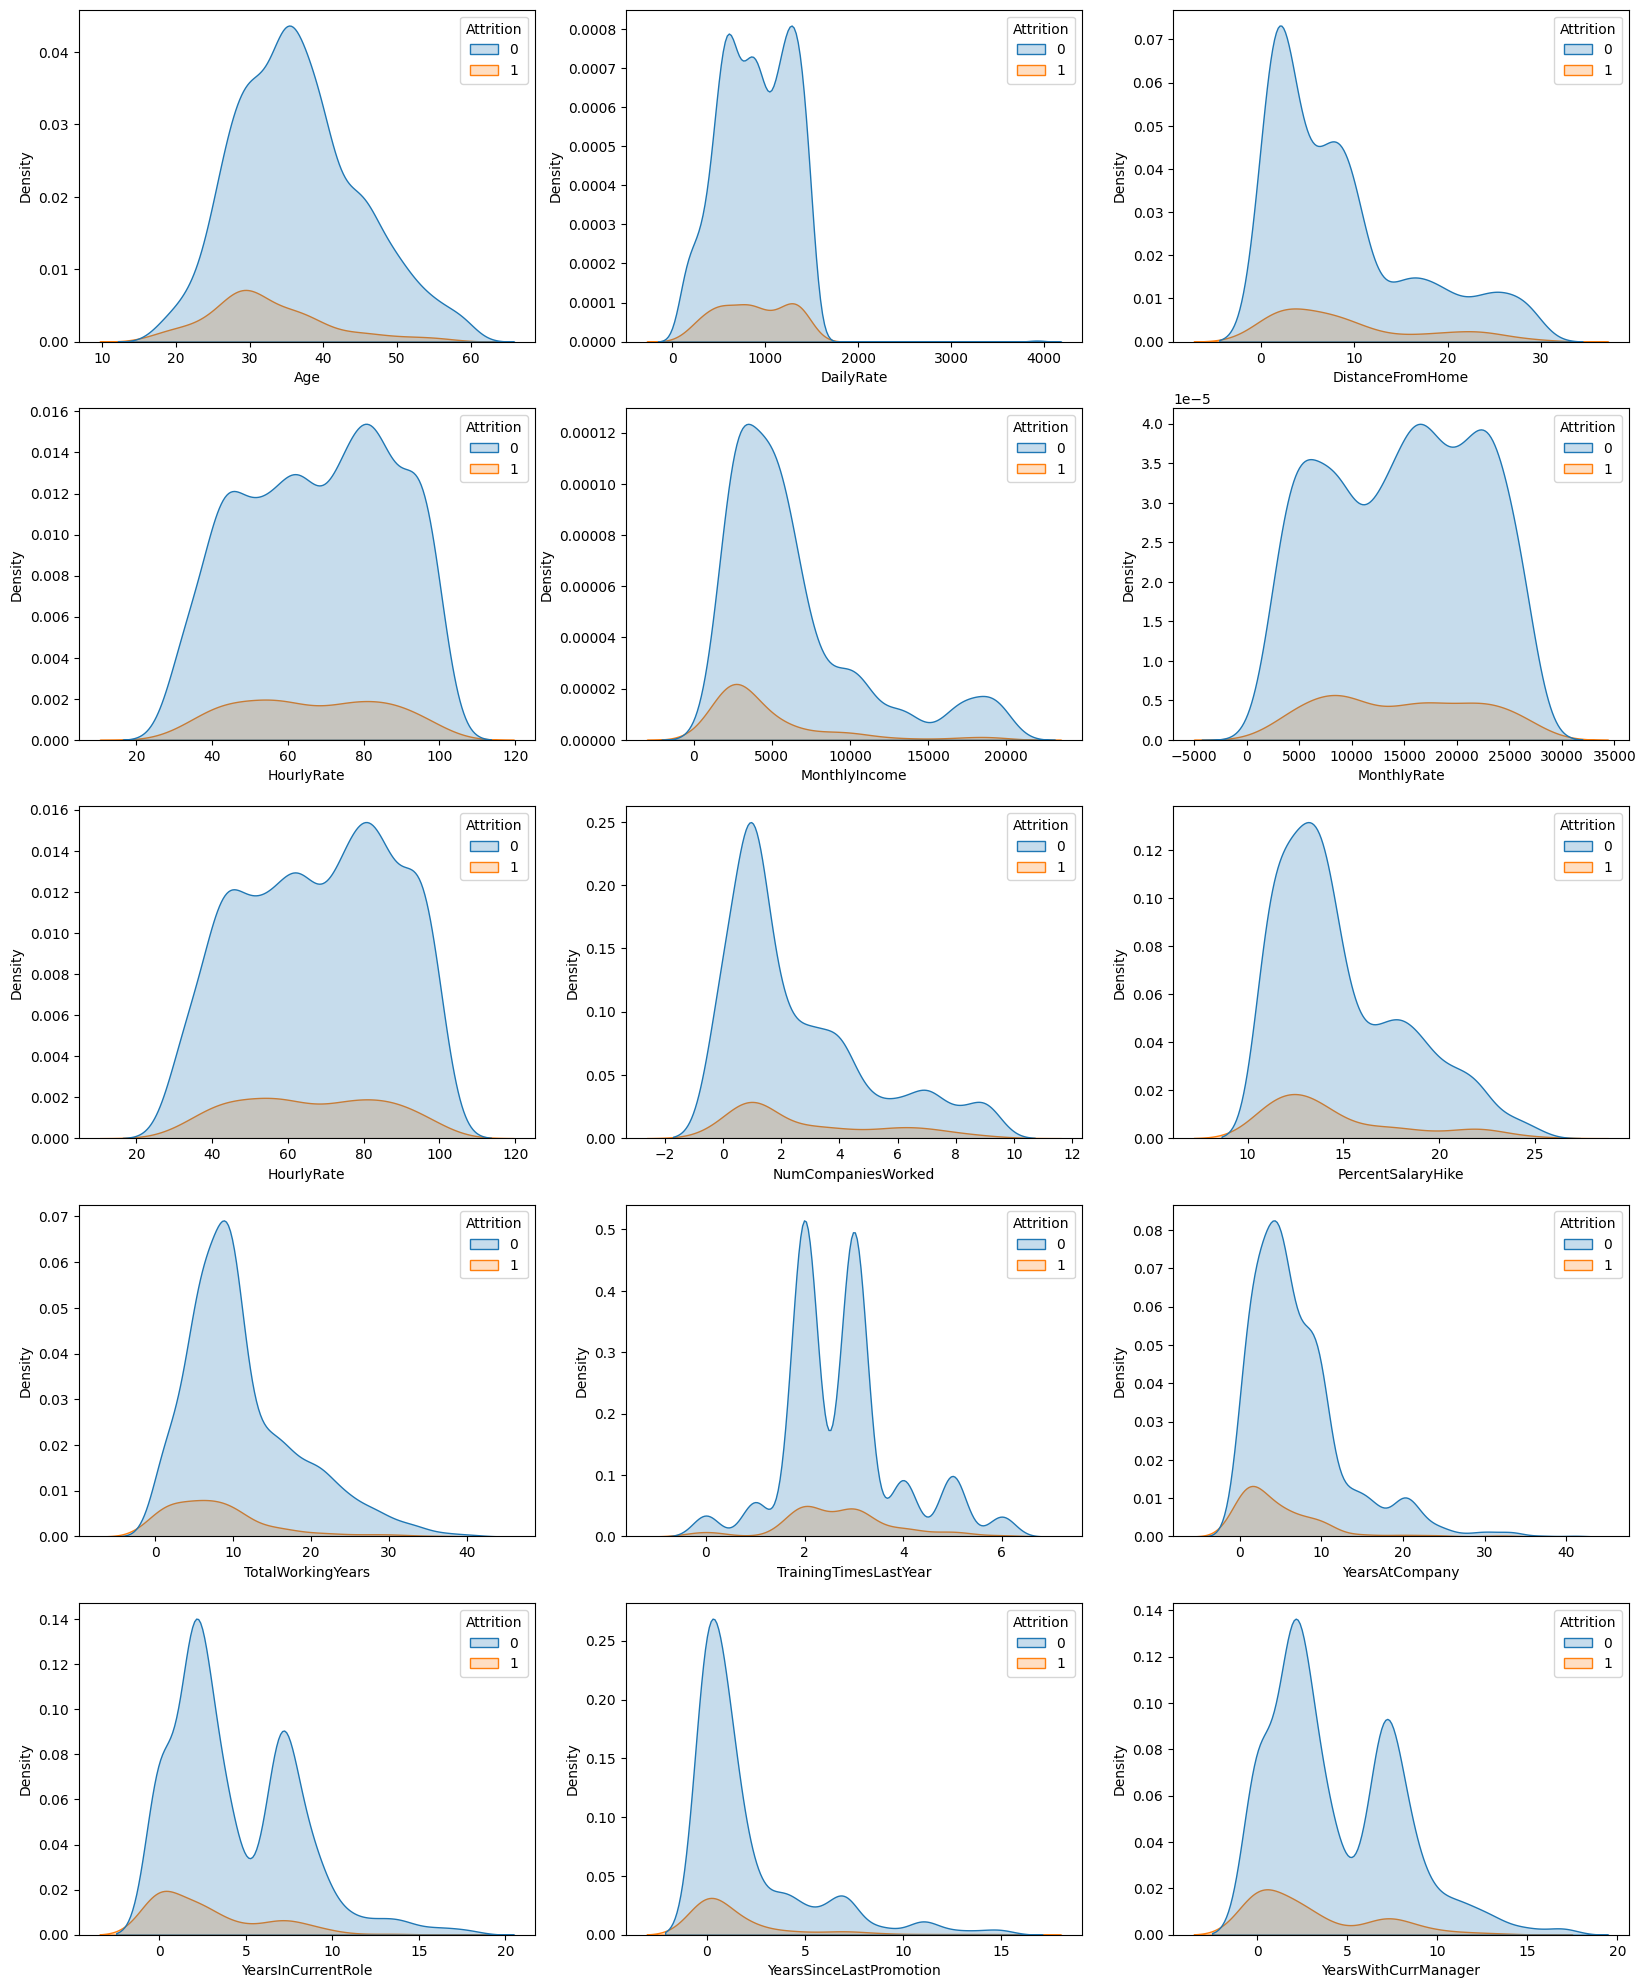

In [9]:
fig, ax = plt.subplots(5, 3, figsize = (20, 5*5))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=train, x=col, fill = True, ax = ax[i // 3][i % 3], hue=conf.target)

# Dataset

In [10]:
X = train.copy()
y = train.Attrition
X = X.drop('Attrition',axis=1)

In [11]:
train.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [12]:
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=7, shuffle=True)

# Preprocessor Pipline

In [13]:
cat_attr=['Over18','OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'BusinessTravel', 'Department']
num_attr=[ 'Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

preprocessor=ColumnTransformer([
    ('num',StandardScaler(),num_cols),
    ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
])

# Cross Validation 5 folds 

## Logistic Regression

In [14]:
model= LogisticRegression()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
cv_auc_mean_lg = cv_auc_scores.mean()
print("Cross-validation ROC AUC scores:", cv_auc_scores)
print("Mean ROC AUC score:", cv_auc_scores.mean())
print("Standard deviation of ROC AUC score:", cv_auc_scores.std())

Cross-validation ROC AUC scores: [0.79949324 0.88462838 0.76576271 0.83016949 0.86567797]
Mean ROC AUC score: 0.8291463582226293
Standard deviation of ROC AUC score: 0.04315241265605657


## Decision Tree

In [15]:
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
cv_auc_mean_dt = cv_auc_scores.mean()
print("Cross-validation ROC AUC scores:", cv_auc_scores)
print("Mean ROC AUC score:", cv_auc_scores.mean())
print("Standard deviation of ROC AUC score:", cv_auc_scores.std())

Cross-validation ROC AUC scores: [0.57635135 0.57702703 0.52987288 0.58199153 0.60127119]
Mean ROC AUC score: 0.5733027943197435
Standard deviation of ROC AUC score: 0.023524650710711498


## Random Forest

In [16]:
model=RandomForestClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
cv_auc_mean_rf = cv_auc_scores.mean()
print("Cross-validation ROC AUC scores:", cv_auc_scores)
print("Mean ROC AUC score:", cv_auc_scores.mean())
print("Standard deviation of ROC AUC score:", cv_auc_scores.std())

Cross-validation ROC AUC scores: [0.81009291 0.82428209 0.78902542 0.81436441 0.85076271]
Mean ROC AUC score: 0.8177055084745763
Standard deviation of ROC AUC score: 0.020137984645933575


## XGB

In [17]:
model= XGBClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
cv_auc_mean_xgb = cv_auc_scores.mean()
print("Cross-validation ROC AUC scores:", cv_auc_scores)
print("Mean ROC AUC score:", cv_auc_scores.mean())
print("Standard deviation of ROC AUC score:", cv_auc_scores.std())

Cross-validation ROC AUC scores: [0.81841216 0.81984797 0.77118644 0.82711864 0.81118644]
Mean ROC AUC score: 0.8095503321117729
Standard deviation of ROC AUC score: 0.019837762178822934


## LGBMClassifier

In [18]:
import lightgbm as lgb
model = lgb.LGBMClassifier(verbose=-1)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
cv_auc_mean_lgbm = cv_auc_scores.mean()
print("Cross-validation ROC AUC scores:", cv_auc_scores)
print("Mean ROC AUC score:", cv_auc_scores.mean())
print("Standard deviation of ROC AUC score:", cv_auc_scores.std())

Cross-validation ROC AUC scores: [0.79366554 0.83859797 0.77855932 0.81889831 0.84923729]
Mean ROC AUC score: 0.8157916857535501
Standard deviation of ROC AUC score: 0.026548828031538872


## Catboost

In [19]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(verbose=False)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

cv_auc_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
cv_auc_mean_cat = cv_auc_scores.mean()
print("Cross-validation ROC AUC scores:", cv_auc_scores)
print("Mean ROC AUC score:", cv_auc_scores.mean())
print("Standard deviation of ROC AUC score:", cv_auc_scores.std())

Cross-validation ROC AUC scores: [0.83513514 0.878125   0.77220339 0.83279661 0.86279661]
Mean ROC AUC score: 0.8362113490609253
Standard deviation of ROC AUC score: 0.036258427340982884


## Compare

In [23]:
pd.DataFrame({
    'model': ['Logit', 'DecisionTree', 'RandomForest', 'XGBoost', 'LGBM', 'CatBoost'],
    'score': [cv_auc_mean_lg, cv_auc_mean_dt, cv_auc_mean_rf, cv_auc_mean_xgb, cv_auc_mean_lgbm, cv_auc_mean_cat]
}).sort_values(by='score', ascending=False)

,model,score
5,CatBoost,0.836211
0,Logit,0.829146
2,RandomForest,0.817706
4,LGBM,0.815792
3,XGBoost,0.809550
1,DecisionTree,0.573303


# Submitting

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'DailyRate', 'DistanceFromHome',
                                  'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                                  'HourlyRate', 'NumCompaniesWorked',
                                  'PercentSalaryHike', 'TotalWorkingYears',
                                  'TrainingTimesLastYear', 'YearsAtCompany',
                                  'YearsInCurrentRole',
                                  'YearsSinceLastPromotion',
                                  'YearsWithCurrManager']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'WorkLifeBalance', 'id'],
      dtype='object'))])

In [28]:
train_tf = preprocessor.fit_transform(X)
test_tf = preprocessor.transform(test)

model = CatBoostClassifier(verbose=False)
model.fit(train_tf, y)
sample_pred = model.predict(test_tf)

In [29]:
sample['Attrition'] = sample_pred
sample

,id,Attrition
0,1677,0
1,1678,0
2,1679,0
3,1680,0
4,1681,1
...,...,...
1114,2791,0
1115,2792,0
1116,2793,0
1117,2794,0


In [30]:
sample.to_csv('submission.csv',index=False)